# Edge Detection

This notebook tests the edge detection algorithm.

## Import all the things

Import regular packages

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline

import cv2
from scipy import signal
import numpy as np
from cmath import pi

Add relative path

In [3]:
import sys
import os
sys.path.append(os.path.join('..','Scripts'))

Import Diffraction Tool

In [4]:
from DiffractionTool import ImageSys4f
from DiffractionTool import HelperFunctions as hp

### Global Paramters

In [5]:
N_size=3001
#μm plane [1000,1000]μm 
interval=0.3
actualSize=N_size*interval
xyInterval=[interval]*2

In [6]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")

### Sample Image

In [7]:
#filename='maki.png'
filename='Prob3Data.png'
imgActualSize=300

In [8]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
grayImg=hp.normalize(grayImg)

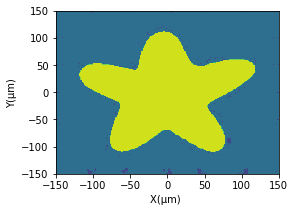

In [9]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(grayImg,labels,range)

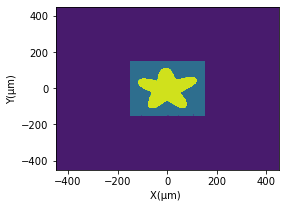

In [10]:
targetImg=hp.pad_and_resize(grayImg,imgActualSize,actualSize,N_size)
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

### Mathematical Convolution

#### Define a kernel

Scharr Kernel

In [11]:
edgeFilter_scharr=np.array([[ -3-3j, 0-10j,  +3 -3j],[-10+0j, 0+ 0j, +10 +0j],\
    [ -3+3j, 0+10j,  +3 +3j]])

In [12]:
print(edgeFilter_scharr)

[[ -3. -3.j   0.-10.j   3. -3.j]
 [-10. +0.j   0. +0.j  10. +0.j]
 [ -3. +3.j   0.+10.j   3. +3.j]]


Center Kernel

In [13]:
edgeFilter_center=10*np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

In [14]:
print(edgeFilter_center)

[[  0 -10   0]
 [-10  40 -10]
 [  0 -10   0]]


#### Edge detection results

Scharr

In [15]:
resImg=signal.convolve2d(targetImg,edgeFilter_scharr,mode='same')

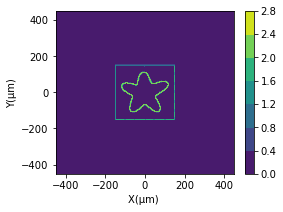

In [16]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(np.log(np.absolute(resImg)+1),labels,range,enableColorBar=True)

Center

In [17]:
resImg=signal.convolve2d(targetImg,edgeFilter_center,mode='same')

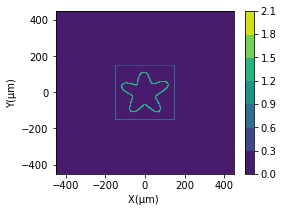

In [18]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(np.log(np.absolute(resImg)+1),labels,range,enableColorBar=True)

### Using 4F physical imaging system

#### Parameters

In [19]:
waveLambda=0.633
f=1000
r=600
k=2.0*pi/waveLambda

In [20]:
edgeDetector=ImageSys4f(N_size,xyInterval,k,f,r)

#### Performance Test

##### None filter

In [21]:
U0=np.sqrt(targetImg)

In [22]:
Uen=edgeDetector.generate_image(U0)

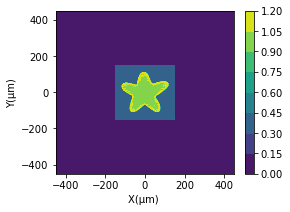

In [23]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(np.flip(hp.intensity(Uen),(0,1)),labels,range,enableColorBar=True)

##### Scharr Filter

In [24]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_scharr,1e3)

In [25]:
Ues=edgeDetector.generate_image(U0,fqFilter)

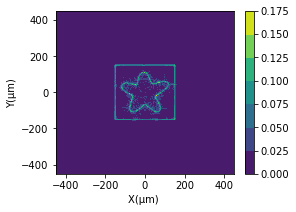

In [26]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(np.flip(hp.intensity(Ues),(0,1)),labels,range,enableColorBar=True)

##### Center Filter

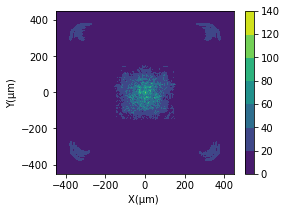

In [27]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_center,1e5)
Uec=edgeDetector.generate_image(U0,fqFilter)
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(np.flip(hp.intensity(Uec),(0,1)),labels,range,enableColorBar=True)

##### Zoom In

None Filter

In [28]:
resImg=np.flip(hp.intensity(Uen),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

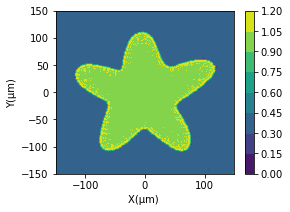

In [29]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Scharr Filter

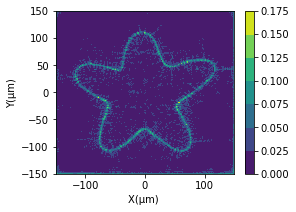

In [30]:
resImg=np.flip(hp.intensity(Ues),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Center Filter

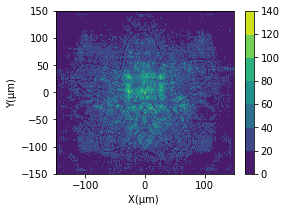

In [31]:
resImg=np.flip(hp.intensity(Uec),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

#### Play with other images

##### Image 1: Maki

Load the image

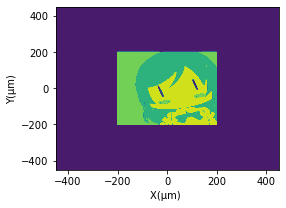

In [32]:
filename='maki.png'
imgActualSize=400

grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
grayImg=hp.normalize(grayImg)
targetImg=hp.pad_and_resize(grayImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

U0=np.sqrt(targetImg)

None Filter

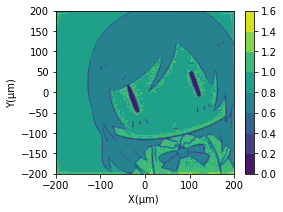

In [33]:
Uen=edgeDetector.generate_image(U0)

resImg=np.flip(hp.intensity(Uen),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Physical Scharr Filter

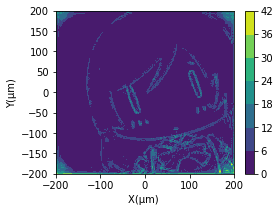

In [34]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_scharr,1e4)

Ues=edgeDetector.generate_image(U0,fqFilter)

resImg=np.flip(hp.intensity(Ues),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)


Mathematical Scharr Filter

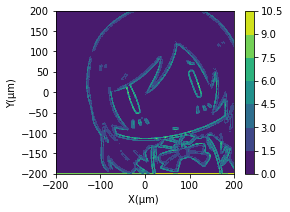

In [35]:
resImg=np.abs(signal.convolve2d(targetImg,edgeFilter_scharr,mode='same'))

zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)


##### Image 2: Pop Ko

Load the image

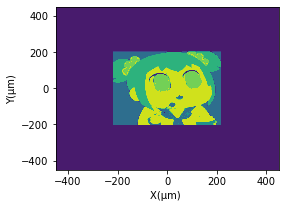

In [36]:
filename='popKo.png'
imgActualSize=400

grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
grayImg=hp.normalize(grayImg)
targetImg=hp.pad_and_resize(grayImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

U0=np.sqrt(targetImg)

None Filter

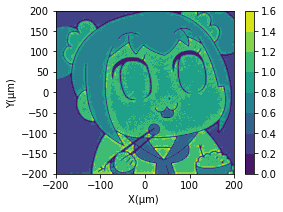

In [37]:
Uen=edgeDetector.generate_image(U0)

resImg=np.flip(hp.intensity(Uen),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Physical Scharr Filter

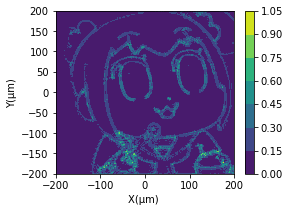

In [38]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_scharr,1e3)

Ues=edgeDetector.generate_image(U0,fqFilter)

resImg=np.flip(hp.intensity(Ues),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)


Mathematical Scharr Filter

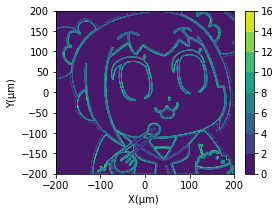

In [39]:
resImg=np.abs(signal.convolve2d(targetImg,edgeFilter_scharr,mode='same'))

zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

##### Image 3: The cow

Load the image

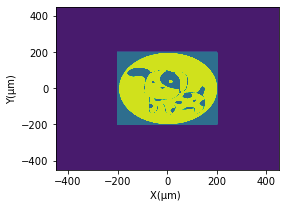

In [40]:
filename='theCow.png'
imgActualSize=400

grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
grayImg=hp.normalize(grayImg)
targetImg=hp.pad_and_resize(grayImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

U0=np.sqrt(targetImg)

None Filter

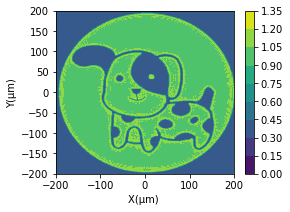

In [41]:
Uen=edgeDetector.generate_image(U0)

resImg=np.flip(hp.intensity(Uen),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Physical Scharr Filter

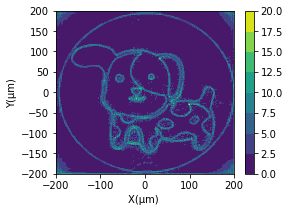

In [42]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_scharr,1e4)

Ues=edgeDetector.generate_image(U0,fqFilter)

resImg=np.flip(hp.intensity(Ues),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Mathematic Scharr Filter

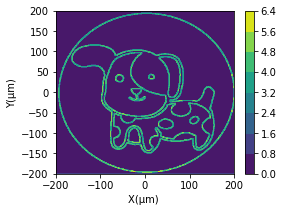

In [43]:
resImg=np.abs(signal.convolve2d(targetImg,edgeFilter_scharr,mode='same'))

zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

##### Image 4: Valve

Load the image

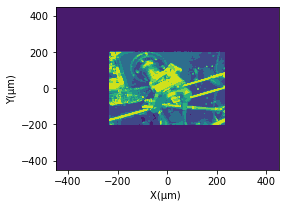

In [44]:
filename='valve.png'
imgActualSize=400

grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
grayImg=hp.normalize(grayImg)
targetImg=hp.pad_and_resize(grayImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

U0=np.sqrt(targetImg)

None Filter

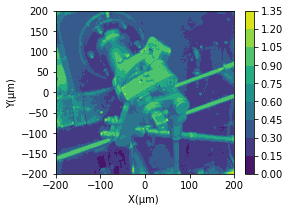

In [45]:
Uen=edgeDetector.generate_image(U0)

resImg=np.flip(hp.intensity(Uen),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Physical Scharr Filter

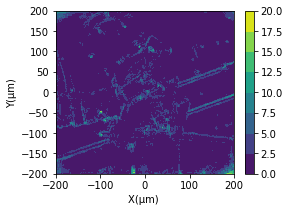

In [46]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_scharr,1e4)

Ues=edgeDetector.generate_image(U0,fqFilter)

resImg=np.flip(hp.intensity(Ues),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size,pad=10)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Mathematical Scharr Filter

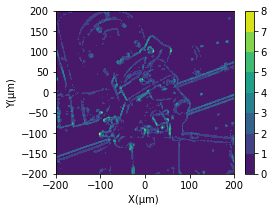

In [47]:
resImg=np.abs(signal.convolve2d(targetImg,edgeFilter_scharr,mode='same'))

zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size,pad=10)

labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)